In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("WELFake_Dataset.csv")
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17376\3240240774.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,2

id                                              title  \
0  0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1  1                                                NaN   
2  2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text label Unnamed: 4  \
0  No comment is expected from Barack Obama Membe...     1        NaN   
1     Did they post their votes for Hillary already?     1        NaN   
2   Now, most of the demonstrators gathered last ...     1        NaN   
3  A dozen politically active pastors came here f...     0        NaN   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...     1        NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 676  \
0        NaN        NaN        NaN        NaN        NaN  ...          NaN   
1        NaN        NaN        NaN        NaN        NaN  ...          NaN   
2        NaN        NaN        NaN        NaN        NaN  ...          NaN   
3        NaN        NaN        NaN        NaN        NaN  ...          NaN   
4        NaN        NaN        NaN        NaN        NaN  ...          NaN   

  Unnamed: 677 Unnamed: 678 Unnamed: 679 Unnamed: 680 Unnamed: 681  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 682 Unnamed: 683 Unnamed: 684 Unnamed: 685  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 686 columns]

In [3]:
import unicodedata

def clean_unicode(text):
    if isinstance(text, str):
        # Normalize unicode characters
        text = unicodedata.normalize("NFKD", text)
        # Encode to ASCII and ignore unsupported characters
        text = text.encode("ascii", "ignore").decode("ascii")
    return text

# Clean all string columns
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].apply(clean_unicode)


In [4]:
# 0 : real , 1: fake

In [5]:
data = data[['title', 'text', 'label']]


In [6]:
print(data.head())
print(data.columns)


                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text label  
0  No comment is expected from Barack Obama Membe...     1  
1     Did they post their votes for Hillary already?     1  
2   Now, most of the demonstrators gathered last ...     1  
3  A dozen politically active pastors came here f...     0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...     1  
Index(['title', 'text', 'label'], dtype='object')


In [7]:
data.isnull().sum()


title    2961
text     3609
label    4321
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
print(data.head())

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text label  
0  No comment is expected from Barack Obama Membe...     1  
2   Now, most of the demonstrators gathered last ...     1  
3  A dozen politically active pastors came here f...     0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...     1  
5  All we can say on this one is it s about time ...     1  


In [10]:
len(data[data["label"]==0])

7071

In [11]:
len(data[data["label"]==1])

7421


EDA( Exploratory Data Analysis)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False  # for minus sign rendering


In [14]:
values_count = data["label"].value_counts()

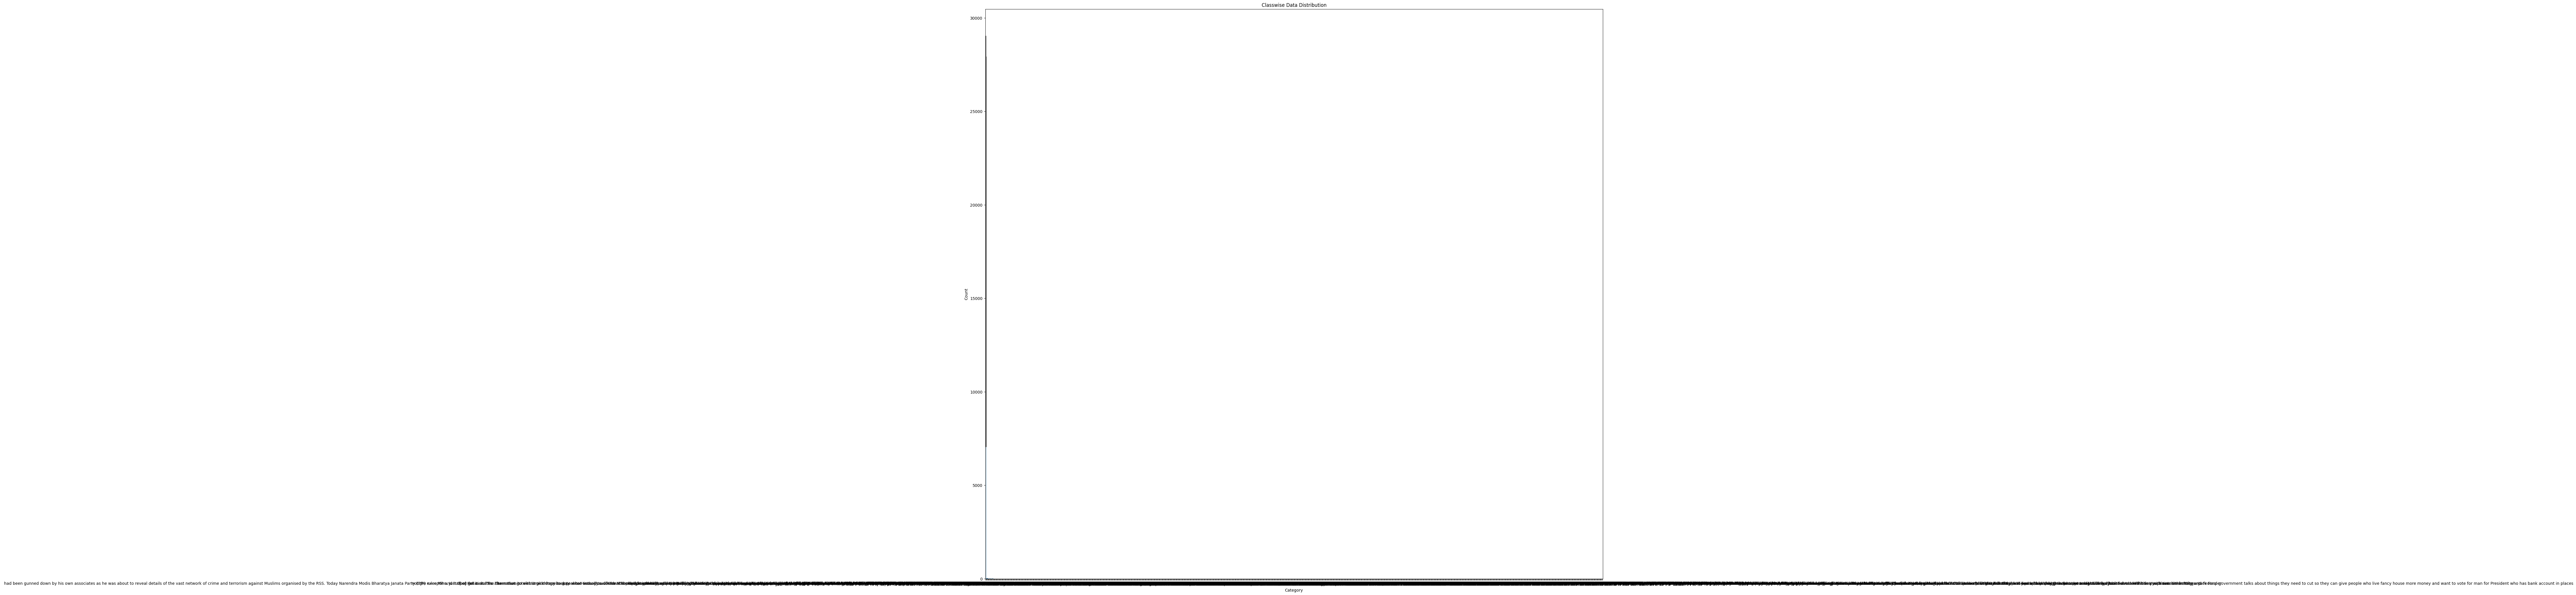

In [15]:
plt.figure(figsize=(28, 26))
sns.barplot(x=values_count.index, y=values_count.values)
plt.title("Classwise Data Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [16]:
data["news_size"]=data["text"].apply(len)
data.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text label  news_size  
0  No comment is expected from Barack Obama Membe...     1       5049  
2   Now, most of the demonstrators gathered last ...     1        216  
3  A dozen politically active pastors came here f...     0       7955  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...     1       1908  
5  All we can say on this one is it s about time ...     1       1530

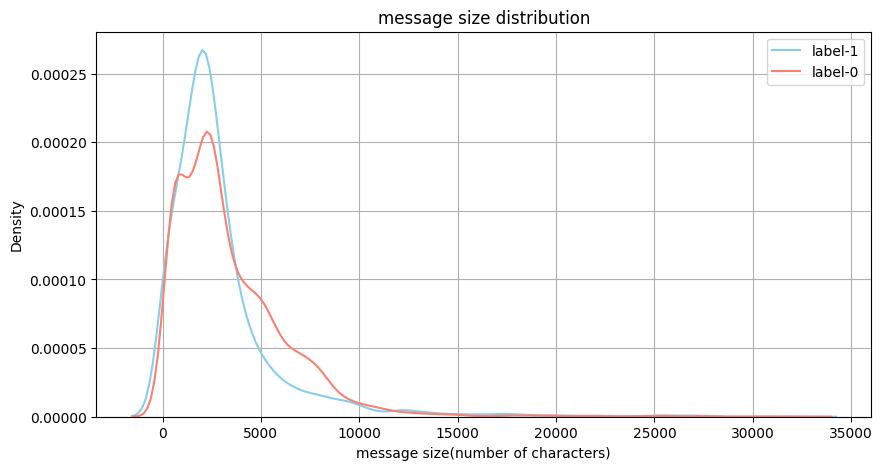

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(data[data["label"]==1]["news_size"],color="skyblue",label="label-1")
sns.kdeplot(data[data["label"]==0]["news_size"],color="salmon",label="label-0")
plt.title("message size distribution")
plt.xlabel("message size(number of characters)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

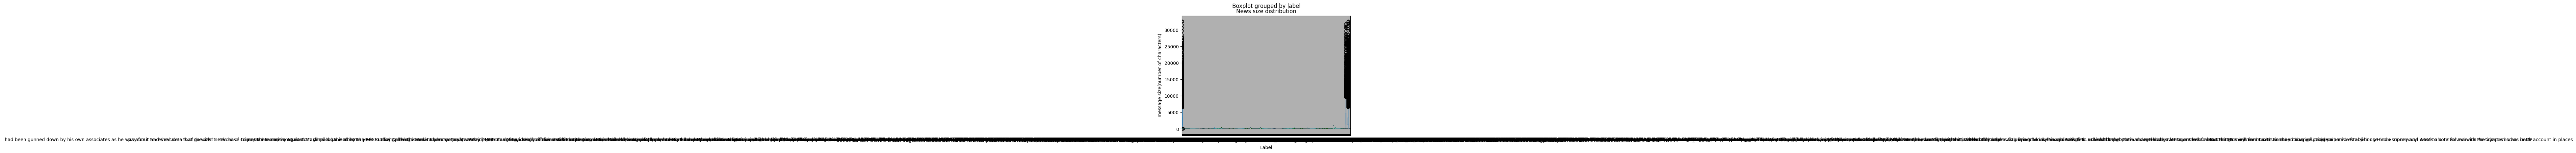

In [18]:
plt.figure(figsize=(10,6))
data.boxplot(column="news_size",by="label",grid=True)
plt.title("News size distribution")
plt.xlabel("Label")
plt.ylabel("message size(number of characters)")
plt.show()

In [19]:
max(data["news_size"])

32655

Text Preprocessing


In [20]:
import nltk
import os

# 🔧 Force NLTK to use your local folder
nltk_data_path = r"C:\Projects\fake_news\nltk_data"
os.makedirs(nltk_data_path, exist_ok=True)
nltk.data.path = [nltk_data_path]  # overwrite all paths

# ✅ Download the needed packages
nltk.download('punkt_tab', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Projects\fake_news\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Projects\fake_news\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Projects\fake_news\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Projects\fake_news\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
import nltk
print("NLTK search paths:")
print(nltk.data.path)

NLTK search paths:
['C:\\Projects\\fake_news\\nltk_data']


In [22]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return " ".join(tokens)


In [23]:
sentence = "The striped bats are hanging on their feet for best!"
print("Cleaned Text:", clean_text(sentence))


Cleaned Text: striped bat hanging foot best


In [24]:
data["text"]=data["text"].apply(clean_text)

In [25]:
data.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text label  news_size  
0  comment expected barack obama member fyf911 fu...     1       5049  
2  demonstrator gathered last night exercising co...     1        216  
3  dozen politically active pastor came private d...     0       7955  
4  rs28 sarmat missile dubbed satan 2 replace ss1...     1       1908  
5  say one time someone sued southern poverty law...     1       1530

Model Building : LSTM model

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,classification_report

In [27]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [28]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data["text"])
x=tokenizer.texts_to_sequences(data["text"])

In [29]:
len(tokenizer.index_word)

332386

In [30]:
x

[[162,
  450,
  415,
  25,
  94,
  67883,
  177352,
  10420,
  525,
  108,
  12401,
  4561,
  35,
  6,
  1754,
  2935,
  280,
  964,
  99,
  164,
  269,
  454,
  6047,
  1273,
  35,
  6,
  1754,
  1150,
  417,
  838,
  129,
  6,
  111172,
  111173,
  2878,
  108,
  10421,
  964,
  2587,
  99,
  3095,
  489,
  108,
  10421,
  14413,
  761,
  964,
  99,
  9512,
  67883,
  111174,
  182,
  759,
  45180,
  1510,
  99,
  2892,
  220,
  142,
  67883,
  2149,
  371,
  5392,
  6127,
  35,
  9512,
  182,
  964,
  142,
  4779,
  177353,
  964,
  99,
  5130,
  3024,
  1510,
  954,
  869,
  67884,
  99,
  3441,
  836,
  142,
  12401,
  838,
  35,
  43269,
  22000,
  871,
  2963,
  964,
  99,
  811,
  1026,
  688,
  489,
  436,
  5,
  16,
  2095,
  36383,
  201,
  576,
  302,
  340,
  273,
  12030,
  67883,
  491,
  177354,
  5393,
  129,
  156,
  1,
  710,
  89710,
  418,
  14413,
  16,
  4,
  3421,
  111175,
  177355,
  8,
  4,
  2326,
  1,
  620,
  201,
  2326,
  1976,
  2849,
  581,
  909,
  12

In [31]:
maxlen=50
x=pad_sequences(x,padding="pre",maxlen=maxlen)
x

array([[ 2878,     1,  1996, ...,   172,   688,    36],
       [    0,     0,     0, ...,  1684,  2643,  9173],
       [  239,   558,     1, ...,  3296,    20,   193],
       ...,
       [  257,   548,   126, ...,  1725,   311,   548],
       [20010,   203,  3399, ...,    34,   396,   566],
       [   51,  1079,   437, ...,   882, 13420,   451]], dtype=int32)

In [32]:
x[0]

array([  2878,      1,   1996,    146,    220,   3507,   2995,   6127,
        11270,   1108,     35,   4971,     16,     17,   1008,    726,
         1008,     67,   4058,   6720,   6661,   5394, 177360, 177361,
       177362, 177363,    698,    130,    423,  43271,   1660,  12085,
         5380,    698,     29,    763,      8,    903,    763,    129,
          156,  14312,   6317,   8486,     17, 177364,    629,    172,
          688,     36], dtype=int32)

In [33]:
len(x)

73177

In [34]:
len(data["text"])

73177

In [35]:
data["text"][0]

'comment expected barack obama member fyf911 fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf911 lolatwhitefear twitter page 953 pm show urging supporter call fyf911 tonight continue dismantle illusion white snapshot twitter radio call invite fyf911the radio show aired 1000 pm eastern standard timeduring show caller clearly call lynching killing white peoplea 239 minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting fyf911 conference callsan unidentified black man said mother fkers start fing like u bunch niers takin one u roll said cause already roll gang anyway six seven black mother fckers see white person lynch as let turn table conspire

In [36]:
y=data["label"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming maxlen and tokenizer are already defined
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=40, input_length=maxlen))
model.add(LSTM(150))
model.add(Dense(1, activation='sigmoid'))

# 👇 Force build the model before summary
model.build(input_shape=(None, maxlen))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


c:\Projects\fake_news\venv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 40)         │    13,295,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       114,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,410,231 (51.16 MB)

 Trainable params: 13,410,231 (51.16 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# ✅ Make sure x_train and x_test are lists of strings
x_train = [str(text) for text in x_train]
x_test = [str(text) for text in x_test]

# ⚙️ Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# ⏫ Padding
maxlen = 100
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen, padding='post', truncating='post')

# ✅ Convert y labels to int32 numpy arrays
import numpy as np

# Safely convert y labels to integers
def is_numeric(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

# Clean training data
x_train_clean = []
y_train_clean = []

for x, y in zip(x_train, y_train):
    if is_numeric(y):
        x_train_clean.append(x)
        y_train_clean.append(int(float(y)))

# Clean testing data
x_test_clean = []
y_test_clean = []

for x, y in zip(x_test, y_test):
    if is_numeric(y):
        x_test_clean.append(x)
        y_test_clean.append(int(float(y)))

# Final cleaned data
x_train = x_train_clean
y_train = np.array(y_train_clean)
x_test = x_test_clean
y_test = np.array(y_test_clean)



In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Get the final vocab size
vocab_size = len(tokenizer.word_index) + 1

# Build model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=40, input_length=maxlen))
model.add(LSTM(150))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
model.fit(
    pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=maxlen, padding='post'),
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(
        pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=maxlen, padding='post'),
        y_test
    )
)


Epoch 1/5
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 350s 192ms/step - accuracy: 0.5090 - loss: 0.6018 - val_accuracy: 0.5086 - val_loss: 0.9938
Epoch 2/5
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 319s 179ms/step - accuracy: 0.5103 - loss: -28.9894 - val_accuracy: 0.5086 - val_loss: 1.3410
Epoch 3/5
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 306s 171ms/step - accuracy: 0.5108 - loss: -12.1420 - val_accuracy: 0.5086 - val_loss: 1.9545
Epoch 4/5
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 4539s 3s/step - accuracy: 0.5120 - loss: -7.1422 - val_accuracy: 0.5086 - val_loss: 2.7943
Epoch 5/5
1786/1786 ━━━━━━━━━━━━━━━━━━━━ 5714s 3s/step - accuracy: 0.5131 - loss: -16.9603 - val_accuracy: 0.5086 - val_loss: 3.8751


In [51]:
MAX_LEN = 50  # make sure this matches training

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=MAX_LEN)

y_pred = model.predict(x_test_pad)



447/447 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step


In [52]:
y_pred

array([[0.9999795 ],
       [0.99997973],
       [0.9999819 ],
       ...,
       [0.99997985],
       [0.99997914],
       [0.99997956]], dtype=float32)

In [53]:
Y_pred=np.round(y_pred)

In [54]:
print("accuracy:",accuracy_score(y_test,Y_pred) )
print(classification_report(y_test,Y_pred))

accuracy: 0.4918491569299657
              precision    recall  f1-score   support

           0       0.02      0.00      0.00      7022
           1       0.50      0.97      0.66      7270
        1947       0.00      0.00      0.00         1

    accuracy                           0.49     14293
   macro avg       0.17      0.32      0.22     14293
weighted avg       0.26      0.49      0.34     14293



c:\Projects\fake_news\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Projects\fake_news\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Projects\fake_news\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [55]:
model.save("lstm_model.h5")